In [1]:

from xbbg import blp
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

vector = ["EURUSD CURNCY", "GBPUSD CURNCY","AUDUSD CURNCY", "USDCAD CURNCY","CLA COMDTY", "NGA COMDTY", "USGG2Y INDEX","USGG10Y INDEX", "ESA INDEX", "SX5E INDEX", "GDBR2 INDEX",
         "GDBR10 INDEX", "USDBRL CURNCY", "USDCNH CURNCY", "XAUUSD CURNCY"]
start='20220101'
end=datetime.date.today()

data = blp.bdh(vector, 'LAST_PRICE', start,end)
data = data.dropna()

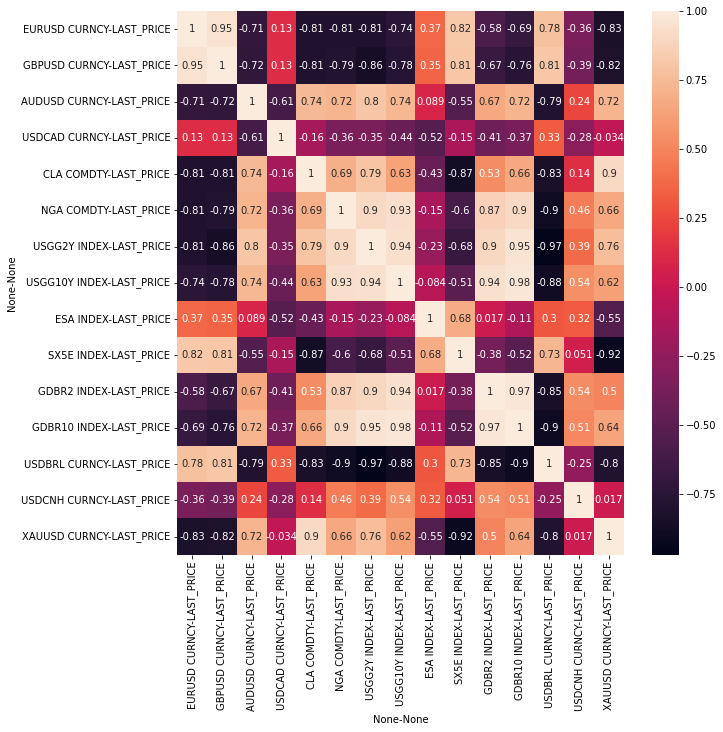

In [2]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [3]:

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

C:\Users\dramaswami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\dramaswami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [4]:

n = data_scaled.shape[1]

pca = PCA(n_components = n, random_state = 1)
pca_fitted = pca.fit_transform(data_scaled)
pca_dframe = pd.DataFrame(data = pca_fitted)

exp_var = pca.explained_variance_ratio_


C:\Users\dramaswami\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Cumulative Variance Explained')

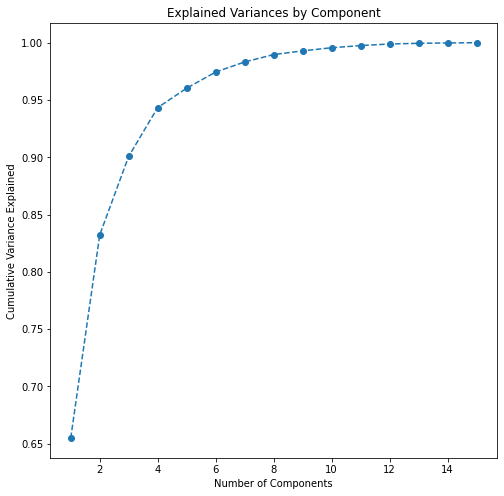

In [5]:
plt.figure(figsize = (8,8))
plt.plot(range(1,n+1), exp_var.cumsum(), marker = "o", linestyle = "--")
plt.title("Explained Variances by Component")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")


In [6]:

pcols = ["Comp1", "Comp2", "Comp3", "Comp4"]

pca_loadings = pd.DataFrame(np.round(pca.components_[:4, :],2)   , index = pcols, columns = data_scaled.columns)

def color_high(val):
    if val<=-0.3:
        return "background:pink"
    if val>=0.3:
        return "background:skyblue"

pca_loadings.T.style.applymap(color_high)


,,Comp1,Comp2,Comp3,Comp4
EURUSD CURNCY,LAST_PRICE,-0.280000,-0.120000,-0.060000,0.410000
GBPUSD CURNCY,LAST_PRICE,-0.290000,-0.100000,-0.100000,0.320000
AUDUSD CURNCY,LAST_PRICE,0.260000,-0.130000,-0.450000,-0.170000
USDCAD CURNCY,LAST_PRICE,-0.100000,0.430000,0.530000,0.020000
CLA COMDTY,LAST_PRICE,0.270000,0.190000,-0.200000,-0.160000
NGA COMDTY,LAST_PRICE,0.300000,-0.100000,0.110000,0.100000
USGG2Y INDEX,LAST_PRICE,0.310000,-0.050000,0.030000,0.170000
USGG10Y INDEX,LAST_PRICE,0.290000,-0.180000,0.140000,0.170000
ESA INDEX,LAST_PRICE,-0.090000,-0.520000,-0.200000,-0.270000
SX5E INDEX,LAST_PRICE,-0.240000,-0.370000,0.060000,0.110000


In [7]:

from statsmodels.graphics.gofplots import ProbPlot

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")



<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 2022-01-03 to 2022-04-22
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (EURUSD CURNCY, LAST_PRICE)  73 non-null     float64
 1   (GBPUSD CURNCY, LAST_PRICE)  73 non-null     float64
 2   (AUDUSD CURNCY, LAST_PRICE)  73 non-null     float64
 3   (USDCAD CURNCY, LAST_PRICE)  73 non-null     float64
 4   (CLA COMDTY, LAST_PRICE)     73 non-null     float64
 5   (NGA COMDTY, LAST_PRICE)     73 non-null     float64
 6   (USGG2Y INDEX, LAST_PRICE)   73 non-null     float64
 7   (USGG10Y INDEX, LAST_PRICE)  73 non-null     float64
 8   (ESA INDEX, LAST_PRICE)      73 non-null     float64
 9   (SX5E INDEX, LAST_PRICE)     73 non-null     float64
 10  (GDBR2 INDEX, LAST_PRICE)    73 non-null     float64
 11  (GDBR10 INDEX, LAST_PRICE)   73 non-null     float64
 12  (USDBRL CURNCY, LAST_PRICE)  73 non-null     float64
 13  (USDCNH CU

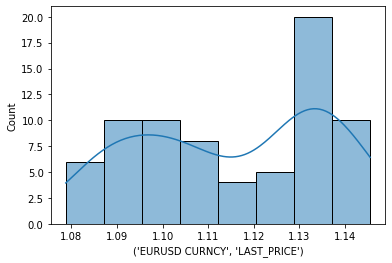

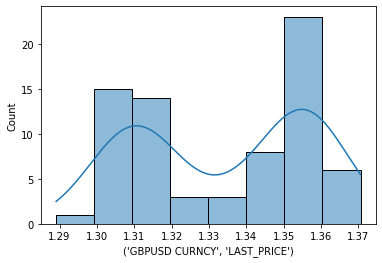

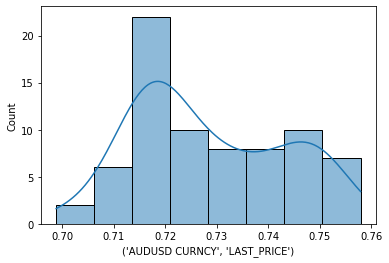

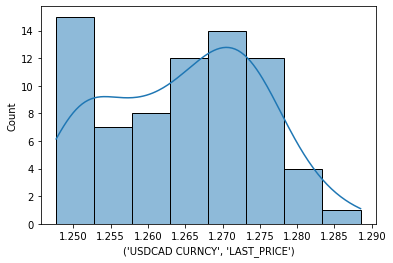

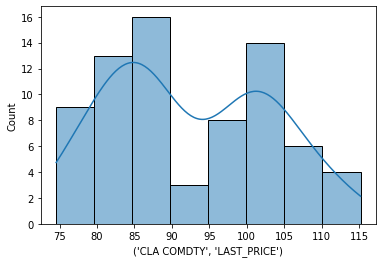

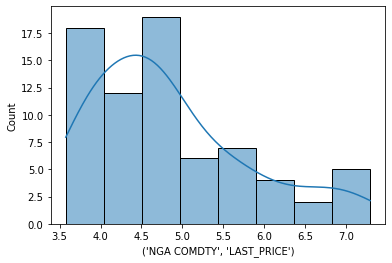

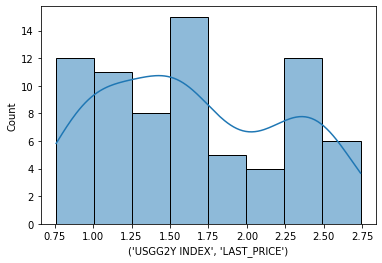

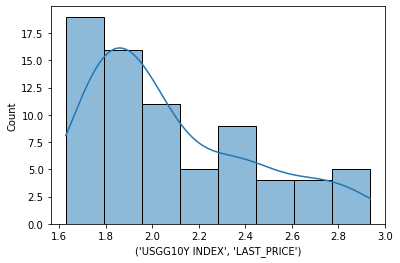

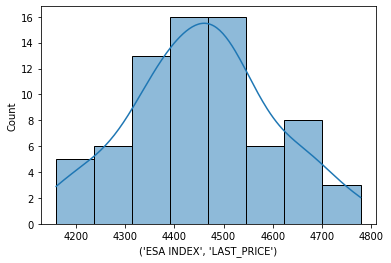

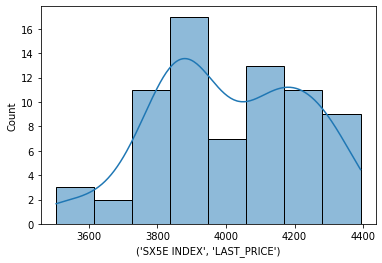

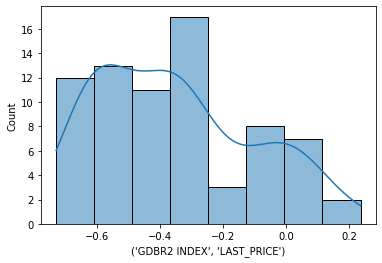

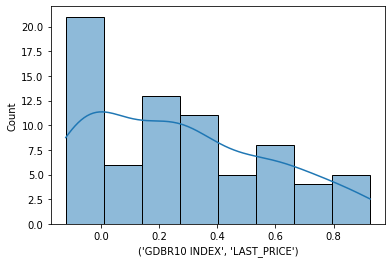

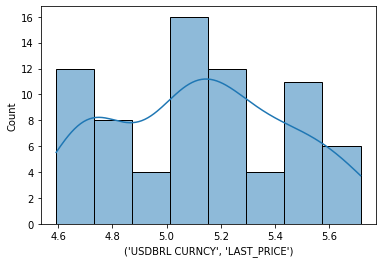

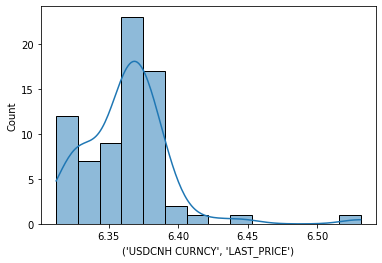

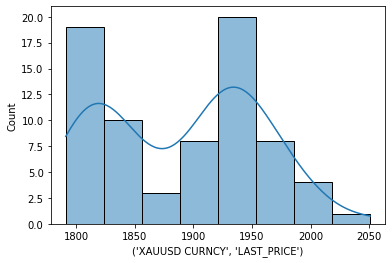

In [8]:
dataset = data
dataset.info()

for i in dataset.columns:
    plt.figure(figsize = (6,4))
    sns.histplot(data = dataset, x = i, kde = True)
    plt.show()



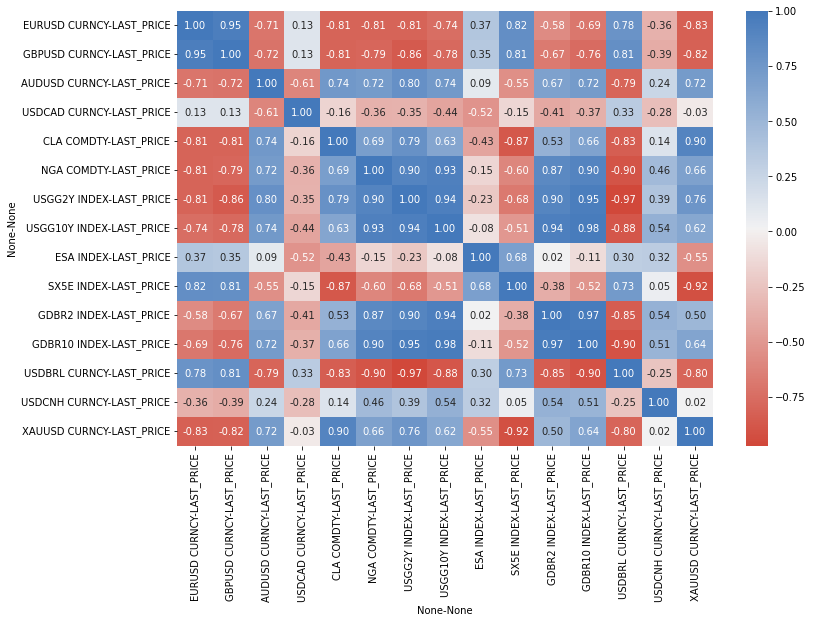

In [9]:

plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(15, 250, as_cmap=True)
sns.heatmap(data=dataset.corr(),annot=True,fmt='.2f',cmap=cmap ) #write your code here
plt.show()



In [10]:

# separate the dependent and independent variable





In [18]:


factors = ["EURUSD CURNCY", "GBPUSD CURNCY","AUDUSD CURNCY", "USDCAD CURNCY","CLA COMDTY", "NGA COMDTY", "USGG2Y INDEX","USGG10Y INDEX", "ESA INDEX", "SX5E INDEX", "GDBR2 INDEX",
         "GDBR10 INDEX", "USDBRL CURNCY", "USDCNH CURNCY", "XAUUSD CURNCY"]

data2 = blp.bdh(factors, 'LAST_PRICE', start,end)
data2 = data2.dropna()
Y = data2["EURUSD CURNCY"]
X = data2.drop(columns = {'EURUSD CURNCY'})
# add the intercept term
X = sm.add_constant(X)
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)



In [19]:


from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))


                        feature            VIF
0                         const  662142.688315
1   (GBPUSD CURNCY, LAST_PRICE)      16.458846
2   (AUDUSD CURNCY, LAST_PRICE)      35.125258
3   (USDCAD CURNCY, LAST_PRICE)       8.506107
4      (CLA COMDTY, LAST_PRICE)      16.947185
5      (NGA COMDTY, LAST_PRICE)      25.079550
6    (USGG2Y INDEX, LAST_PRICE)     233.006749
7   (USGG10Y INDEX, LAST_PRICE)      82.669784
8       (ESA INDEX, LAST_PRICE)      11.299589
9      (SX5E INDEX, LAST_PRICE)      29.200893
10    (GDBR2 INDEX, LAST_PRICE)      58.252099
11   (GDBR10 INDEX, LAST_PRICE)     158.251238
12  (USDBRL CURNCY, LAST_PRICE)     119.222881
13  (USDCNH CURNCY, LAST_PRICE)       4.889483
14  (XAUUSD CURNCY, LAST_PRICE)      25.781876


In [20]:
model2 = sm.OLS(y_train, X_train).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LAST_PRICE   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     122.3
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           5.32e-26
Time:                        08:32:25   Log-Likelihood:                 224.67
No. Observations:                  51   AIC:                            -419.3
Df Residuals:                      36   BIC:                            -390.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               1.6075      0.401      4.011      0.000       0.795       2.420
('GBPUSD CURNCY', 'LAST_PRICE')     0.5722      0.084      6.818      0.000       0.402       0.742
('AUDUSD CURNCY', 'LAST_PRICE')    -0.3370      0.201     -1.677      0.102      -0.745       0.070
('USDCAD CURNCY', 'LAST_PRICE')    -0.4725      0.145     -3.261      0.002      -0.766      -0.179
('CLA COMDTY', 'LAST_PRICE')    -2.862e-05      0.000     -0.149      0.883      -0.000       0.000
('NGA COMDTY', 'LAST_PRICE')       -0.0063      0.003     -2.407      0.021      -0.012      -0.001
('USGG2Y INDEX', 'LAST_PRICE')      0.0012      0.013      0.096      0.924      -0.025       0.027
('USGG10Y INDEX', 'LAST_PRICE')    -0.0416      0.013     -3.278      0.002      -0.067      -0.016
('ESA INDEX', 'LAST_PRICE')      6.597e-06   1.14e-05      0.577      0.567   -1.66e-05    2.98e-05
('SX5E INDEX', 'LAST_PRICE')    -1.853e-05   1.25e-05     -1.482      0.147   -4.39e-05    6.83e-06
('GDBR2 INDEX', 'LAST_PRICE')       0.0444      0.015      2.897      0.006       0.013       0.075
('GDBR10 INDEX', 'LAST_PRICE')      0.0333      0.021      1.621      0.114      -0.008       0.075
('USDBRL CURNCY', 'LAST_PRICE')     0.0127      0.017      0.756      0.455      -0.021       0.047
('USDCNH CURNCY', 'LAST_PRICE')    -0.0419      0.035     -1.209      0.235      -0.112       0.028
('XAUUSD CURNCY', 'LAST_PRICE') -2.214e-05   3.81e-05     -0.580      0.565   -9.95e-05    5.52e-05
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   2.187
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.001
Skew:                           0.004   Prob(JB):                        0.999
Kurtosis:                       2.976   Cond. No.                     5.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""